![intro](images/intro.png)


## Here is the background information on your task
Sprocket Central Pty Ltd  , a medium size bikes & cycling accessories organisation, has approached Tony Smith (Partner) in KPMG’s Lighthouse & Innovation Team. Sprocket Central Pty Ltd  is keen to learn more about KPMG’s expertise in its Analytics, Information & Modelling team. 

Smith discusses KPMG’s expertise in this space (you can read more here). In particular, he speaks about how the team can effectively analyse the datasets to help Sprocket Central Pty Ltd grow its business.

Primarily, Sprocket Central Pty Ltd needs help with its customer and transactions data. The organisation has a large dataset relating to its customers, but their team is unsure how to effectively analyse it to help optimise its marketing strategy. 

However, in order to support the analysis, you speak to the Associate Director for some ideas and she advised that “the importance of optimising the quality of customer datasets cannot be underestimated. The better the quality of the dataset, the better chance you will be able to use it drive company growth.”

The client provided KPMG with 3 datasets:

- Customer Demographic 
- Customer Addresses
- Transactions data in the past 3 months
You decide to start the preliminary data exploration and identify ways to improve the quality of Sprocket Central Pty Ltd’s data.

“Hi there – Welcome again to the team! The client has asked our team to assess the quality of their data; as well as make recommendations on ways to clean the underlying data and mitigate these issues.  Can you please take a look at the datasets we’ve received and draft an email to them identifying the data quality issues and how this may impact our analysis going forward?

I will send through an example of a typical data quality framework that can be used as a guide. Remember to consider the join keys between the tables too. Thanks again for your help.”

## Email from manager

Hi there,

As per voicemail, please find the 3 datasets attached from Sprocket Central Pty Ltd:

Customer Demographic 
Customer Addresses
Transaction data in the past three months
Can you please review the data quality to ensure that it is ready for our analysis in phase two. Remember to take note of any assumptions or issues we need to go back to the client on. As well as recommendations going forward to mitigate current data quality concerns.

I’ve also attached a data quality framework as a guideline. Let me know if you have any questions.

Thanks for your help.

Kind Regards
Your Manager

## Here is your task:
Draft an email to the client identifying the data quality issues and strategies to mitigate these issues. Refer to ‘Data Quality Framework Table’ and resources below for criteria and dimensions which you should consider.

Items Required to do this module:


Required File: The dataset from Sprocket Central
This is the dataset to evaluate for data quality. Read the instructions on the title sheet. There are multiple sheets.
**KPMG_Virtual_internship_dataset_insidesherpa.xlsx**


File copyright KPMG. For use for the Virtual Internship Only.

_You may use programs like Excel, Google Sheets, Tableau, Power BI to start. Feel free to use Python, R Programming Language, MatLab and other data analytics tools that you know of._

In [2]:
!pip install rfm_segmentation

Defaulting to user installation because normal site-packages is not writeable
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


**Let us start by loading up the necessary packages.**

In [3]:
# Read data
import pandas as pd
from pandas_profiling import ProfileReport
import numpy as np

# Visualize data
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import missingno as msno

# Configure visualizations
plt.rcParams['figure.figsize'] = [8, 4]
sns.set_theme(style='darkgrid')



# Some date/time usefull 
import datetime as dt
from datetime import date

**Load the Data**

**Demographic**

In [4]:
df_demographic = pd.read_excel(
    "data/KPMG_VI_New_raw_data_update_final.xlsx",  # Replace with your Excel file path
    # The following arguments are optional and can be removed:
    # By default pandas will only read the first sheet
    # You can change that by specifying the sheet name(s) or zero-indexed sheet position(s)
    sheet_name="CustomerDemographic",
    # Indicate which zero-indexed row number(s) have the column names
    header=0,
    # If not all columns are needed, indicate which you need (useful for lower memory usage)
    #usecols=(0, 1, 3, 4, 5, 6),
    # List of column names to use (useful for renaming columns)
    #names=["id", "lastname", "country", "city", "street", "number"],
    # Indicate which column(s) to use as row labels
    #index_col="customer_id",
    # Lines starting with this string should be ignored (useful if there are file comments)
    #comment="Last updated:",
    # Indicate the number of lines to skip at the start of the file (also useful for file comments)
    skiprows=1,
    # Indicate string(s) that should be recognized as NaN/NA
    #na_values=["---", "unknown", "no info"],
    # Indicate which column(s) are date column(s)
    parse_dates=True,
    # Indicate number of rows to read (useful for large files)
    #nrows=500,
)

df_demographic.head()  # Preview the DataFrame

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


**Customer_adresses**

In [5]:
df_address = pd.read_excel(
    "data/KPMG_VI_New_raw_data_update_final.xlsx",  # Replace with your Excel file path
    # The following arguments are optional and can be removed:
    # By default pandas will only read the first sheet
    # You can change that by specifying the sheet name(s) or zero-indexed sheet position(s)
    sheet_name="CustomerAddress",
    # Indicate which zero-indexed row number(s) have the column names
    header=0,
    # If not all columns are needed, indicate which you need (useful for lower memory usage)
    #usecols=(0, 1, 3, 4, 5, 6),
    # List of column names to use (useful for renaming columns)
    #names=["id", "lastname", "country", "city", "street", "number"],
    # Indicate which column(s) to use as row labels
    #index_col="customer_id",
    # Lines starting with this string should be ignored (useful if there are file comments)
    #comment="Last updated:",
    # Indicate the number of lines to skip at the start of the file (also useful for file comments)
    skiprows=1,
    # Indicate string(s) that should be recognized as NaN/NA
    #na_values=["---", "unknown", "no info"],
    # Indicate which column(s) are date column(s)
    #parse_dates=True,
    # Indicate number of rows to read (useful for large files)
    #nrows=500,
)

df_address.head()  # Preview the DataFrame

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


**Transactions data in the past 3 months**

In [6]:
df_transactions = pd.read_excel(
    "data/KPMG_VI_New_raw_data_update_final.xlsx",  # Replace with your Excel file path
    # The following arguments are optional and can be removed:
    # By default pandas will only read the first sheet
    # You can change that by specifying the sheet name(s) or zero-indexed sheet position(s)
    sheet_name="Transactions",
    # Indicate which zero-indexed row number(s) have the column names
    header=0,
    # If not all columns are needed, indicate which you need (useful for lower memory usage)
    #usecols=(0, 1, 3, 4, 5, 6),
    # List of column names to use (useful for renaming columns)
    #names=["id", "lastname", "country", "city", "street", "number"],
    # Indicate which column(s) to use as row labels
    #index_col="customer_id",
    # Lines starting with this string should be ignored (useful if there are file comments)
    #comment="Last updated:",
    # Indicate the number of lines to skip at the start of the file (also useful for file comments)
    skiprows=1,
    # Indicate string(s) that should be recognized as NaN/NA
    #na_values=["---", "unknown", "no info"],
    # Indicate which column(s) are date column(s)
    parse_dates=True,
    # Indicate number of rows to read (useful for large files)
    #nrows=500,
)

df_transactions.head()  # Preview the DataFrame

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


## Data Quality Framework Table
Below is a list of the Data Quality dimensions our team may use to evaluate a dataset. Some of these terms are common to the whole industry, so you may find more information and clarity on these terms by searching online.

<img src="images/scr.png">



**Let's explore the DATA according to Data Quality Framework**

In [7]:
df_demographic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            3875 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  default     

<AxesSubplot: >

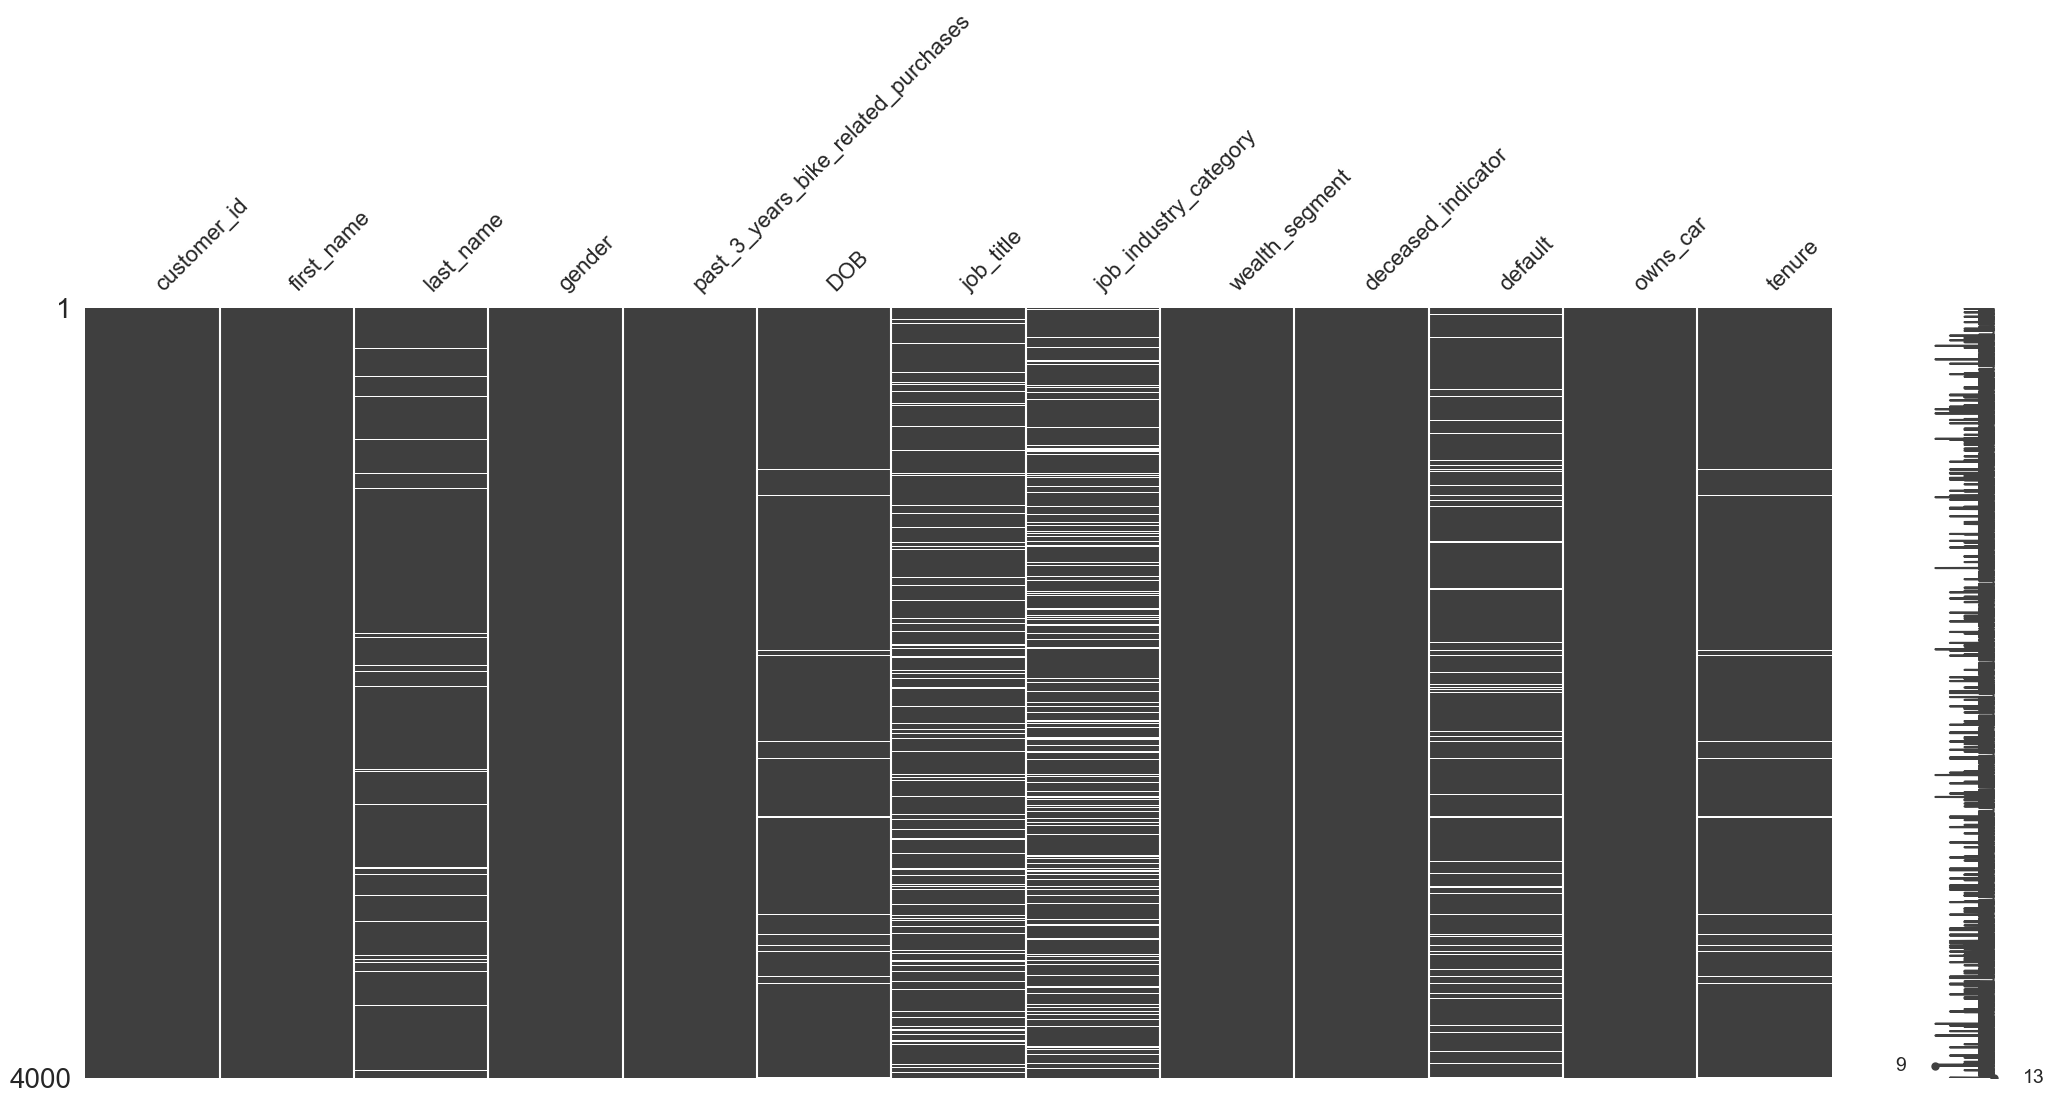

In [8]:
#Explore missing data in Demographic tabel
msno.matrix(df_demographic)


<AxesSubplot: >

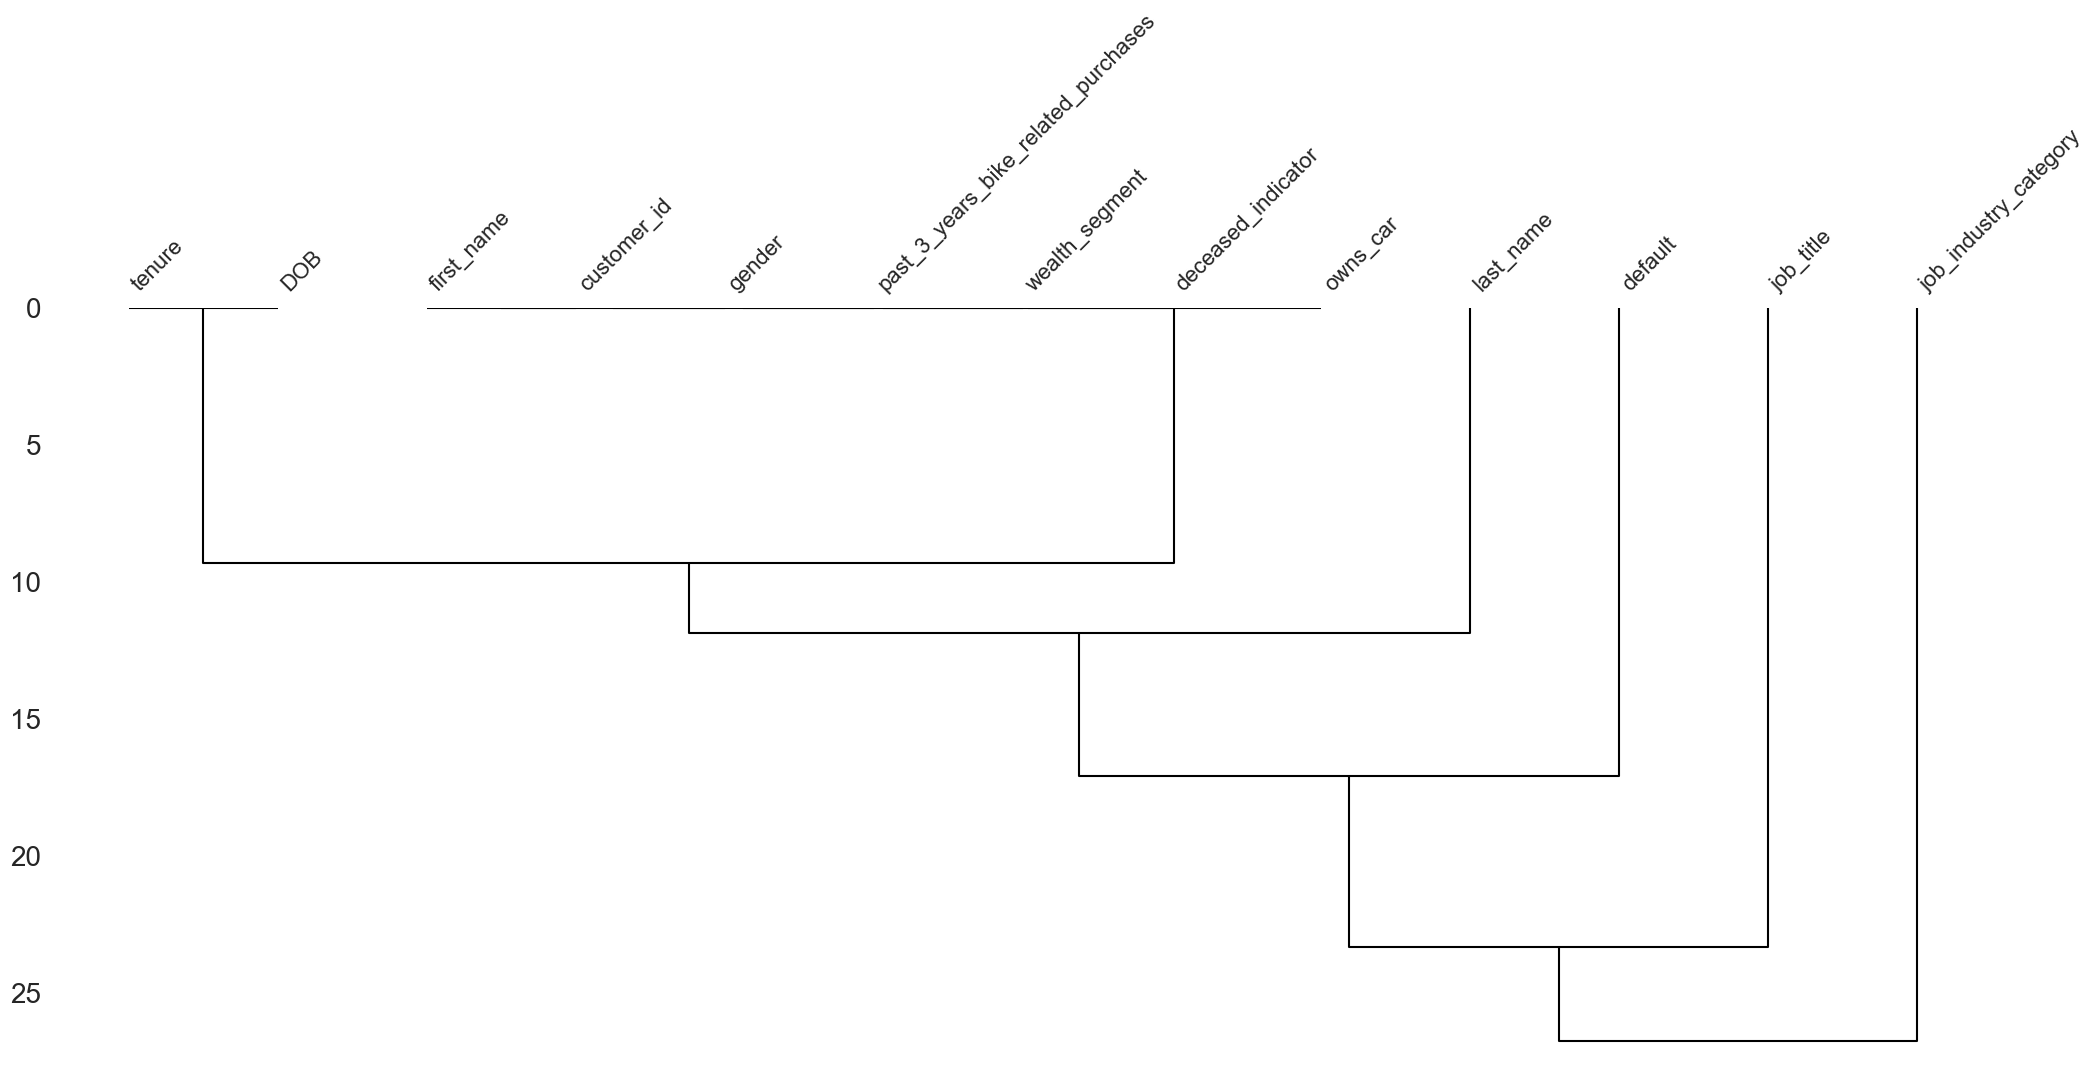

In [9]:
msno.dendrogram(df_demographic)

In [10]:
#Change column types an save some memory

df_demographic["gender"] = df_demographic["gender"].astype('category')

df_demographic['gender'] = df_demographic['gender'].replace(['Femal', 'F'], 'Female')
df_demographic['gender'] = df_demographic['gender'].replace(['M'], 'Male')
df_demographic['gender'] = df_demographic['gender'].replace(['U'], 'Unknown')
df_demographic.gender.value_counts()

Female     2039
Male       1873
Unknown      88
Name: gender, dtype: int64

In [11]:
# Replace 1843 year of birth in DOB column

df_demographic["DOB"] = df_demographic["DOB"].replace(to_replace='1843-12-21T00:00:00.000Z', value='1943-12-21T00:00:00.000Z')
df_demographic

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3996,Rosalia,Halgarth,Female,8,1975-08-09,VP Product Management,Health,Mass Customer,N,-100,No,19.0
3996,3997,Blanch,Nisuis,Female,87,2001-07-13,Statistician II,Manufacturing,High Net Worth,N,â¦testâ§,Yes,1.0
3997,3998,Sarene,Woolley,Unknown,60,NaT,Assistant Manager,IT,High Net Worth,N,NaN,No,NaN
3998,3999,Patrizius,NaN,Male,11,1973-10-24,NaN,Manufacturing,Affluent Customer,N,Â¡â¢Â£Â¢âÂ§Â¶â¢ÂªÂºââ,Yes,10.0


In [12]:
# Let's create age groups according to Australian bureau of Statistics

'''The population is made up of 12.0 per cent Gen Alpha (0-9 years), 18.2 per cent Gen Z (10-24 years), 21.5 per cent Millennials (25-39 years), 19.3 per cent Gen X (40-54 years), 21.5 per cent Baby Boomers (55-74 years) and 7.5 per cent Interwar (75 years and over).'''


# Convert the date of birth column to datetime format
df_demographic["DOB"] = pd.to_datetime(df_demographic["DOB"])

# Create a custom lambda function to calculate the age
# based on the date of birth value
get_age = lambda dob: pd.Timestamp.today().year - dob.year

# Apply the lambda function to the date of birth column
# and create a new column with the age values
df_demographic = df_demographic.assign(age=df_demographic["DOB"].apply(get_age))

# Create a custom lambda function to categorize ages
# based on age

get_age_group = lambda age: "Gen Alpha (0-9 years)" if age <= 9 else "Gen Z (10-24 years)" if age <= 24 else "Millennials (25-39 years)" if age <= 39 else "Gen X (40-54 years)" if age <= 54 else "Baby Boomers (55-74 years)" if age <= 74 else "Interwar"

# Apply the lambda function to the age
# and create a new column with the age group values
df_demographic = df_demographic.assign(age_group=df_demographic["age"].apply(get_age_group))


df_demographic.head()



,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure,age,age_group
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0,70.0,Baby Boomers (55-74 years)
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0,43.0,Gen X (40-54 years)
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0,69.0,Baby Boomers (55-74 years)
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0,62.0,Baby Boomers (55-74 years)
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0,46.0,Gen X (40-54 years)


In [13]:
df_demographic['deceased_indicator'].replace(['N'], 0, inplace=True)
df_demographic['deceased_indicator'].replace(['Y'], 1, inplace=True)

In [14]:
# Change error values in 'state'. New South Wales -> NSW, Victoria -> VIC

df_address.loc[df_address["state"] == "New South Wales", "state"] = "NSW"
df_address.loc[df_address["state"] == "Victoria", "state"] = "VIC"

df_address.state.value_counts()

NSW    2140
VIC    1021
QLD     838
Name: state, dtype: int64

**Creating profiling reports**

In [15]:
# Profiling
'''
profile = ProfileReport(df_demographic, title="Demographics Profiling Report")

profile.to_file("demographic_report.html")
'''

'\nprofile = ProfileReport(df_demographic, title="Demographics Profiling Report")\n\nprofile.to_file("demographic_report.html")\n'

In [16]:
'''
profile_transactions = ProfileReport(df_transactions, title="Transactions Profiling Report")

profile_transactions.to_file("transactions_report.html")
'''

'\nprofile_transactions = ProfileReport(df_transactions, title="Transactions Profiling Report")\n\nprofile_transactions.to_file("transactions_report.html")\n'

In [17]:
'''
profile_address = ProfileReport(df_address, title="Address Profiling Report")

profile_address.to_file("address_report.html")
'''

'\nprofile_address = ProfileReport(df_address, title="Address Profiling Report")\n\nprofile_address.to_file("address_report.html")\n'

In [18]:
'''
profile_new_customers = ProfileReport(df_address, title="New Customers Profiling Report")

profile_new_customers.to_file("new_customert_report.html")
'''

'\nprofile_new_customers = ProfileReport(df_address, title="New Customers Profiling Report")\n\nprofile_new_customers.to_file("new_customert_report.html")\n'

**Fixing values in Transactions**

In [19]:
df_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

In [20]:
df_transactions.online_order.isnull().value_counts()

False    19640
True       360
Name: online_order, dtype: int64

In [21]:
df_transactions.online_order.fillna(value=np.nan, inplace=True)
df_transactions.online_order.isnull().value_counts()

False    19640
True       360
Name: online_order, dtype: int64

In [22]:
df_transactions["online_order"] = df_transactions["online_order"].astype(bool)
df_transactions.online_order.value_counts()


True     10189
False     9811
Name: online_order, dtype: int64

**Merge Adrress and Demographic tables**

In [23]:
df_customers = df_demographic.merge(df_address, how='inner', on='customer_id')
df_customers.head(50)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure,age,age_group,address,postcode,state,country,property_valuation
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,0,"""'",Yes,11.0,70.0,Baby Boomers (55-74 years),060 Morning Avenue,2016,NSW,Australia,10
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,0,<script>alert('hi')</script>,Yes,16.0,43.0,Gen X (40-54 years),6 Meadow Vale Court,2153,NSW,Australia,10
2,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,0,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0,62.0,Baby Boomers (55-74 years),0 Holy Cross Court,4211,QLD,Australia,9
3,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,0,NIL,Yes,8.0,46.0,Gen X (40-54 years),17979 Del Mar Point,2448,NSW,Australia,4
4,6,Curr,Duckhouse,Male,35,1966-09-16,NaN,Retail,High Net Worth,0,ðµ ð ð ð,Yes,13.0,57.0,Baby Boomers (55-74 years),9 Oakridge Court,3216,VIC,Australia,9
5,7,Fina,Merali,Female,6,1976-02-23,NaN,Financial Services,Affluent Customer,0,â°â´âµâââ,Yes,11.0,47.0,Gen X (40-54 years),4 Delaware Trail,2210,NSW,Australia,9
6,8,Rod,Inder,Male,31,1962-03-30,Media Manager I,NaN,Mass Customer,0,(â¯Â°â¡Â°ï¼â¯ï¸µ â»ââ»),No,7.0,61.0,Baby Boomers (55-74 years),49 Londonderry Lane,2650,NSW,Australia,4
7,9,Mala,Lind,Female,97,1973-03-10,Business Systems Development Analyst,Argiculture,Affluent Customer,0,0/0,Yes,8.0,50.0,Gen X (40-54 years),97736 7th Trail,2023,NSW,Australia,12
8,11,Uriah,Bisatt,Male,99,1954-04-30,NaN,Property,Mass Customer,0,ÅâÂ´Â®â Â¥Â¨ËÃ¸Ïââ,No,9.0,69.0,Baby Boomers (55-74 years),93405 Ludington Park,3044,VIC,Australia,8
9,12,Sawyere,Flattman,Male,58,1994-07-21,Nuclear Power Engineer,Manufacturing,Mass Customer,0,nil,No,8.0,29.0,Millennials (25-39 years),44339 Golden Leaf Alley,4557,QLD,Australia,4


In [24]:
# Continue data cleaning and preparation for analysis

df_customers[['job_title','job_industry_category']]=df_customers[['job_title','job_industry_category']].fillna('Unknown')

df_customers.drop('default', axis=1, inplace=True)

In [25]:
df_customers['owns_car'].replace('Yes', 1, inplace=True)
df_customers['owns_car'].replace('No', 0, inplace=True)
df_customers.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,age,age_group,address,postcode,state,country,property_valuation
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,0,1,11.0,70.0,Baby Boomers (55-74 years),060 Morning Avenue,2016,NSW,Australia,10
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,0,1,16.0,43.0,Gen X (40-54 years),6 Meadow Vale Court,2153,NSW,Australia,10
2,4,Talbot,NaN,Male,33,1961-10-03,Unknown,IT,Mass Customer,0,0,7.0,62.0,Baby Boomers (55-74 years),0 Holy Cross Court,4211,QLD,Australia,9
3,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,Unknown,Affluent Customer,0,1,8.0,46.0,Gen X (40-54 years),17979 Del Mar Point,2448,NSW,Australia,4
4,6,Curr,Duckhouse,Male,35,1966-09-16,Unknown,Retail,High Net Worth,0,1,13.0,57.0,Baby Boomers (55-74 years),9 Oakridge Court,3216,VIC,Australia,9


In [26]:
# Remove personal data

df_customers.drop('first_name', axis=1, inplace=True)
df_customers.drop('last_name', axis=1, inplace=True)


In [27]:
# Profiling dataset for Customer analysis
# Save source comment the code below

'''
profile_customers = ProfileReport(df_customers, title="Customers Profiling Report")

profile_customers.to_file("customers_report.html")
'''

'\nprofile_customers = ProfileReport(df_customers, title="Customers Profiling Report")\n\nprofile_customers.to_file("customers_report.html")\n'

# Profiling report "Customers" Outcomes

* for detailed report check [customers_report.html](images/image/customers_report.html)
* <a href ="customers_report.html">link</a>


![image](images/image/image.png)


## Transactions Table joggling

In [28]:
df_transactions.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,True,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [29]:
# Fix column 'product_first_sold_date' format

df_transactions['product_first_sold_date'] = pd.TimedeltaIndex(df_transactions['product_first_sold_date'], unit='d') + dt.datetime(1900,1,1)



In [30]:
df_transactions.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,False,Approved,Solex,Standard,medium,medium,71.49,53.62,2012-12-04
1,2,3,3120,2017-05-21,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,2014-03-05
2,3,37,402,2017-10-16,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1999-07-22
3,4,88,3135,2017-08-31,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,1998-12-18
4,5,78,787,2017-10-01,True,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,2015-08-12


In [31]:
df_transactions.isnull().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order                 0
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

In [32]:
# Drop n/a in transactions

df_transactions_clean = df_transactions.dropna()
print(df_transactions_clean.isnull().sum())
print(df_transactions_clean.shape)

transaction_id             0
product_id                 0
customer_id                0
transaction_date           0
online_order               0
order_status               0
brand                      0
product_line               0
product_class              0
product_size               0
list_price                 0
standard_cost              0
product_first_sold_date    0
dtype: int64
(19803, 13)


In [33]:
# Add 'profit' and 'days_since_last_sale' columns to 'transactions_clean' table

# Calculate how many days since last purchase 
recent_sale = df_transactions_clean['transaction_date'].max()
df_transactions_clean['days_since_last_sale'] = recent_sale - df_transactions_clean['transaction_date']
df_transactions_clean['days_since_last_sale'] /= np.timedelta64(1, 'D')
df_transactions_clean['profit'] = df_transactions_clean['list_price'] - df_transactions_clean['standard_cost']
df_transactions_clean.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,days_since_last_sale,profit
0,1,2,2950,2017-02-25,False,Approved,Solex,Standard,medium,medium,71.49,53.62,2012-12-04,308.0,17.87
1,2,3,3120,2017-05-21,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,2014-03-05,223.0,1702.55
2,3,37,402,2017-10-16,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1999-07-22,75.0,1544.61
3,4,88,3135,2017-08-31,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,1998-12-18,121.0,817.36
4,5,78,787,2017-10-01,True,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,2015-08-12,90.0,1055.82


# RFM Analysis

In [34]:
# Try RFM_segmenation module. All-in-one solution

from rfm_segmentation import rfm_segmentation as rfm 

rfm.rfm_score_generator(df_transactions_clean, "list_price", "transaction_date", "customer_id", "transaction_id")

,customer_id,Frequency,list_price,Recency,R_rank,F_rank,M_rank,R_rank_norm,F_rank_norm,M_rank_norm,RFM_Score,Customer_segment
0,1,11,9084.45,7,3127.5,3421.5,2900.0,90.10,97.95,97.93,4.84,Top
1,2,3,4149.07,128,457.5,444.5,871.0,13.18,12.73,12.72,0.64,Lost
2,3,8,9888.23,102,670.0,2934.0,3072.0,19.30,84.00,83.97,3.71,Medium Value
3,4,2,1047.72,195,137.5,155.5,60.0,3.96,4.45,4.45,0.22,Lost
4,5,6,5903.20,16,2688.0,2032.5,1704.0,77.44,58.19,58.17,3.05,Medium Value
...,...,...,...,...,...,...,...,...,...,...,...,...
3489,3497,3,3744.07,52,1547.0,444.5,703.0,44.57,12.73,12.72,0.87,Lost
3490,3498,6,5177.06,127,462.5,2032.5,1364.0,13.32,58.19,58.17,2.57,Low Value
3491,3499,7,7673.48,51,1569.5,2551.5,2462.0,45.22,73.05,73.03,3.44,Medium Value
3492,3500,6,4922.41,144,338.0,2032.5,1240.0,9.74,58.19,58.17,2.55,Low Value


In [35]:
rfm.rfm_tree_map(df_transactions_clean, "profit", "transaction_date", "customer_id", "transaction_id")

In [36]:
rfm.rfm_pie_chart(df_transactions_clean, "list_price", "transaction_date", "customer_id", "transaction_id")

# Customized RFM Analysis

Add 'past_3_years_bike_related_purcheses' to RFM Frequency value. So this Frequency = 'past_3_years_bike_related_purcheses' - 'last_year'

In [37]:
# Customize RFM_segmentation

def rfm_score_generator_custom(data,totalPaid, day_bought,customerID,  invoiceNo = "", format_ = '%d.%m.%Y', R_w=0.15, F_w=0.28, M_w =0.57):
   
    """
    Parameters
    ----------
    data : the data of customers you want to segment
        
    totalPaid : the monetary value (quantity * unit_price)
        
    day_bought : the date of the purchase
        
    customerID : unique identifier for  each customer
        
    invoiceNo : unique identifier for each purchase
         (Default value = ""), if missing take date of each purchase
    format_ : the date format for day_bought column
         (Default value = '%d.%m.%Y')
    R_w : the weight given to Recency to calculate RFM Score
         (Default value = 0.15)
    F_w : the weight given to Frequency to calculate RFM Score
         (Default value = 0.28)
    M_w : the weight given to Monetary value to calculate RFM Score
         (Default value = 0.57)
    Returns
    The RFM (dataframe) with added columns of Recency, Freqency, Monetary Ranks both normalized and not normalized, RFM Score, and the Segment the Customer belongs to, e.g Loyal customer.
    The Maximum RFM Score is 5.
    """
    
    #if we don't have unique numbers that differentiate each purchase we take the day of the purchase as invoice number for calculating the frequency
    #how many days the customer vistied to the store
    if invoiceNo == "":
        invoiceNo = day_bought
    
    #changing the type of date column  to datetime
    data[day_bought] = pd.to_datetime(data[day_bought],format= format_)
    
    #Calculating the unique number of days/purchases for frequency
    data["Frequency_0"]= data.groupby(customerID)[invoiceNo].transform('nunique')
    data["Frequency"] = data["past_3_years_bike_related_purchases"] - data["Frequency_0"]
    
    #choosing max day_bought to calculate recency later, summing total_paid to calculate total monetary value for each customer, taking already calculated frequency value,
    # as all the values of frequency are the same for each customer we can take max/min/first doesn't matter
    RFM_custom = data.groupby(customerID).agg({day_bought: "max", "Frequency": "max", totalPaid : "sum"}).reset_index()
    
    #taking the last day occuring in the date column and calculating recency from that date
    recent_date = RFM_custom[day_bought].max()
    RFM_custom['Recency'] = RFM_custom[day_bought].apply(lambda x: (recent_date - x).days)

    #ranking Recency, Frequency, Monetary Values, recency from largest to smallest, as the smaller the batter 
    RFM_custom['R_rank'] = RFM_custom['Recency'].rank(ascending=False)
    RFM_custom['F_rank'] = RFM_custom['Frequency'].rank(ascending=True)
    RFM_custom['M_rank'] = RFM_custom[totalPaid].rank(ascending=True)
    #normalizing the ranks
    RFM_custom['R_rank_norm'] = (RFM_custom['R_rank']/RFM_custom['R_rank'].max())*100
    RFM_custom['F_rank_norm'] = (RFM_custom['F_rank']/RFM_custom['F_rank'].max())*100
    RFM_custom['M_rank_norm'] = (RFM_custom['F_rank']/RFM_custom['M_rank'].max())*100
    
    #calculating the rfm score
    RFM_custom['RFM_Score'] = R_w * RFM_custom['R_rank_norm']+ F_w * RFM_custom['F_rank_norm']+ M_w * RFM_custom['M_rank_norm']
    RFM_custom['RFM_Score'] *= 0.05 #rank 5 is the top 
    RFM_custom = RFM_custom.round(1) #rounding the everything in RFM to 2 decimals
    
    
    #segmenting customers 
    RFM_custom["Customer_segment"] = np.where(RFM_custom['RFM_Score'] >
                                      4.5, "Top",
                                      (np.where(
                                        RFM_custom['RFM_Score'] > 4,
                                        "High value",
                                        (np.where(
    RFM_custom['RFM_Score'] > 3,
                             "Medium Value",
                             np.where(RFM_custom['RFM_Score'] > 1.6,
                            'Low Value', 'Inactive'))))))

    
    
    
    return(RFM_custom)


In [38]:
# Custom RFM table preparation. Merge Customers and Transactions table on "customer_id"

cd = df_customers.merge(df_transactions_clean, on="customer_id")
cd.head(50)


,customer_id,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,age,age_group,address,postcode,state,country,property_valuation,transaction_id,product_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,days_since_last_sale,profit,Frequency
0,1,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,0,1,11.0,70.0,Baby Boomers (55-74 years),060 Morning Avenue,2016,NSW,Australia,10,94,86,2017-12-23,False,Approved,OHM Cycles,Standard,medium,medium,235.63,125.07,2005-05-12,7.0,110.56,11
1,1,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,0,1,11.0,70.0,Baby Boomers (55-74 years),060 Morning Avenue,2016,NSW,Australia,10,3765,38,2017-04-06,True,Approved,Solex,Standard,medium,medium,1577.53,826.51,2008-03-21,268.0,751.02,11
2,1,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,0,1,11.0,70.0,Baby Boomers (55-74 years),060 Morning Avenue,2016,NSW,Australia,10,5157,47,2017-05-11,True,Approved,Trek Bicycles,Road,low,small,1720.70,1531.42,2003-07-23,233.0,189.28,11
3,1,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,0,1,11.0,70.0,Baby Boomers (55-74 years),060 Morning Avenue,2016,NSW,Australia,10,9785,72,2017-01-05,False,Approved,Norco Bicycles,Standard,medium,medium,360.40,270.30,2003-09-11,359.0,90.10,11
4,1,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,0,1,11.0,70.0,Baby Boomers (55-74 years),060 Morning Avenue,2016,NSW,Australia,10,13424,2,2017-02-21,False,Approved,Solex,Standard,medium,medium,71.49,53.62,2005-08-11,312.0,17.87,11
5,1,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,0,1,11.0,70.0,Baby Boomers (55-74 years),060 Morning Avenue,2016,NSW,Australia,10,13644,25,2017-05-19,False,Approved,Giant Bicycles,Road,medium,medium,1538.99,829.65,1991-11-12,225.0,709.34,11
6,1,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,0,1,11.0,70.0,Baby Boomers (55-74 years),060 Morning Avenue,2016,NSW,Australia,10,14486,23,2017-03-27,False,Approved,Norco Bicycles,Mountain,low,small,688.63,612.88,1991-08-07,278.0,75.75,11
7,1,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,0,1,11.0,70.0,Baby Boomers (55-74 years),060 Morning Avenue,2016,NSW,Australia,10,14931,31,2017-12-14,True,Approved,Giant Bicycles,Standard,medium,medium,230.91,173.18,2002-03-24,16.0,57.73,11
8,1,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,0,1,11.0,70.0,Baby Boomers (55-74 years),060 Morning Avenue,2016,NSW,Australia,10,15663,32,2017-06-04,True,Approved,Giant Bicycles,Standard,medium,medium,642.70,211.37,2011-03-18,209.0,431.33,11
9,1,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,0,1,11.0,70.0,Baby Boomers (55-74 years),060 Morning Avenue,2016,NSW,Australia,10,16423,9,2017-12-09,True,Approved,OHM Cycles,Road,medium,medium,742.54,667.40,2003-08-07,21.0,75.14,11


In [39]:
RFM_custom = rfm_score_generator_custom(cd, "profit", "transaction_date", "customer_id", "transaction_id", R_w=0.33, F_w=0.52, M_w=0.15)
RFM_custom.head()

,customer_id,transaction_date,Frequency,profit,Recency,R_rank,F_rank,M_rank,R_rank_norm,F_rank_norm,M_rank_norm,RFM_Score,Customer_segment
0,1,2017-12-23,82,3018.1,7,3122.5,3097.5,1857.0,90.1,88.8,88.8,4.5,High value
1,2,2017-08-24,78,2226.3,128,457.5,2973.0,1187.0,13.2,85.2,85.2,3.1,Medium Value
2,4,2017-06-18,31,220.6,195,137.5,1327.0,55.0,4.0,38.0,38.0,1.3,Inactive
3,5,2017-12-14,50,2394.9,16,2684.0,2013.0,1336.0,77.4,57.7,57.7,3.2,Medium Value
4,6,2017-10-27,30,3946.6,64,1263.5,1286.5,2491.0,36.5,36.9,36.9,1.8,Low Value


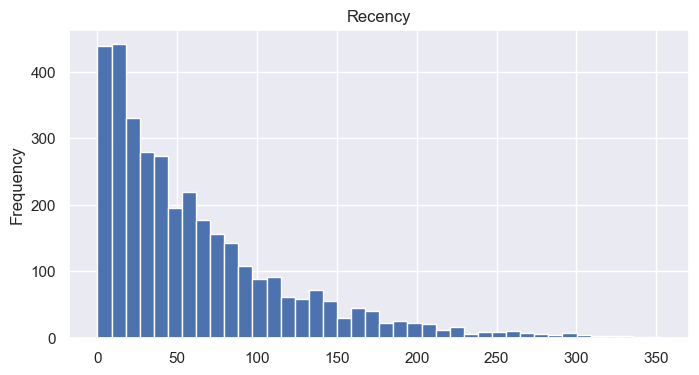

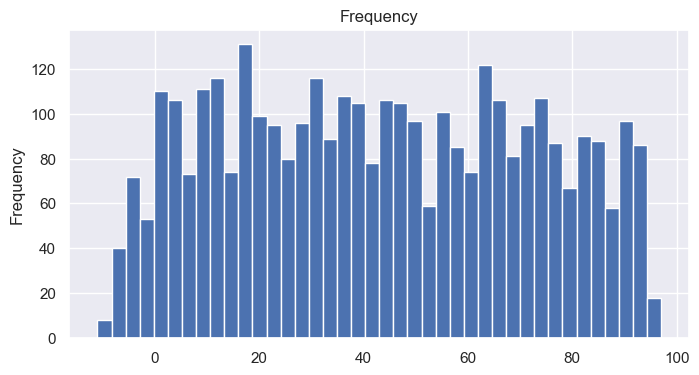

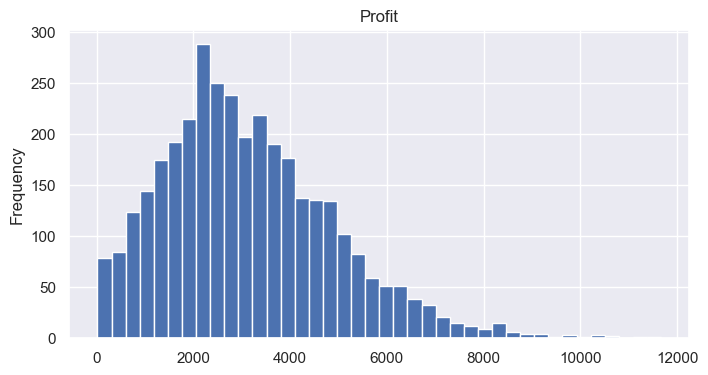

In [40]:

RFM_custom.Recency.plot.hist(bins=40)
plt.title("Recency")
plt.show()

RFM_custom.Frequency.plot.hist(bins=40)
plt.title("Frequency")
plt.show()

RFM_custom.profit.plot.hist(bins=40)
plt.title("Profit")
plt.show()



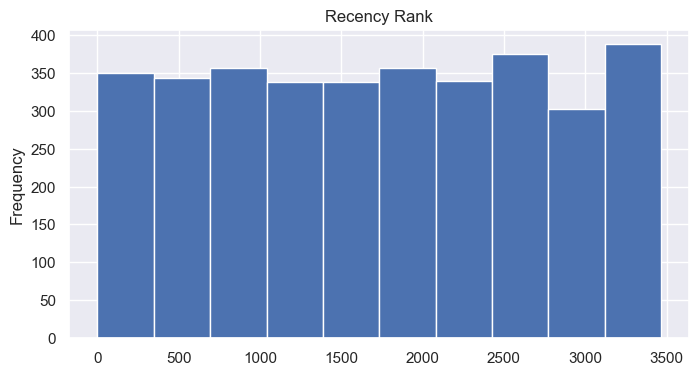

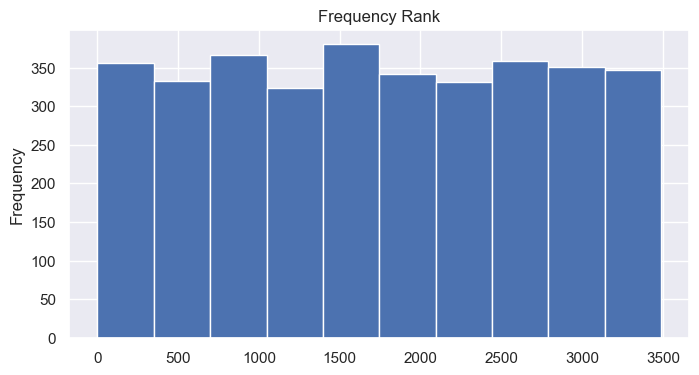

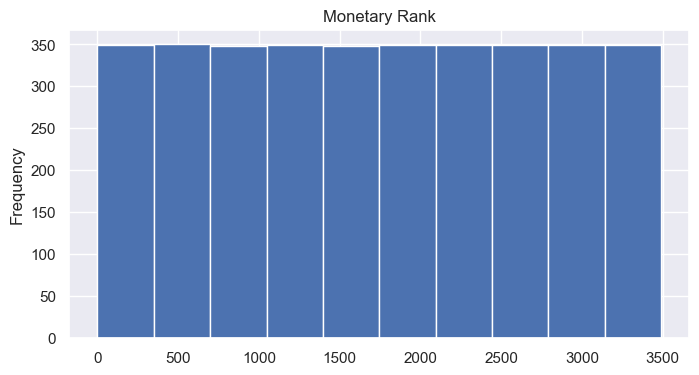

In [41]:
RFM_custom.R_rank.plot.hist()
plt.title("Recency Rank")
plt.show()

RFM_custom.F_rank.plot.hist()
plt.title("Frequency Rank")
plt.show()

RFM_custom.M_rank.plot.hist()
plt.title("Monetary Rank")
plt.show()

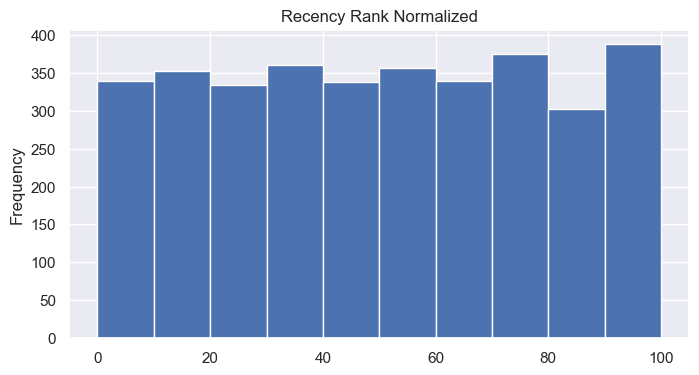

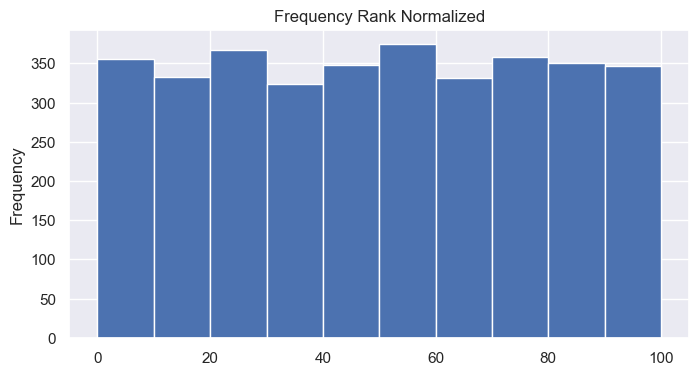

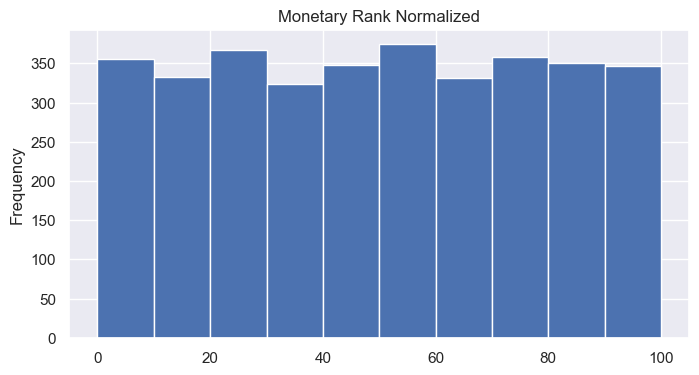

In [42]:
RFM_custom.R_rank_norm.plot.hist()
plt.title("Recency Rank Normalized")
plt.show()

RFM_custom.F_rank_norm.plot.hist()
plt.title("Frequency Rank Normalized")
plt.show()

RFM_custom.M_rank_norm.plot.hist()
plt.title("Monetary Rank Normalized")
plt.show()

In [43]:
RFM_clean = RFM_custom.drop("transaction_date", axis=1)

In [44]:
customers_rfm = df_customers.merge(RFM_clean, on="customer_id")

customers_rfm.head()

,customer_id,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,age,age_group,address,postcode,state,country,property_valuation,Frequency,profit,Recency,R_rank,F_rank,M_rank,R_rank_norm,F_rank_norm,M_rank_norm,RFM_Score,Customer_segment
0,1,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,0,1,11.0,70.0,Baby Boomers (55-74 years),060 Morning Avenue,2016,NSW,Australia,10,82,3018.1,7,3122.5,3097.5,1857.0,90.1,88.8,88.8,4.5,High value
1,2,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,0,1,16.0,43.0,Gen X (40-54 years),6 Meadow Vale Court,2153,NSW,Australia,10,78,2226.3,128,457.5,2973.0,1187.0,13.2,85.2,85.2,3.1,Medium Value
2,4,Male,33,1961-10-03,Unknown,IT,Mass Customer,0,0,7.0,62.0,Baby Boomers (55-74 years),0 Holy Cross Court,4211,QLD,Australia,9,31,220.6,195,137.5,1327.0,55.0,4.0,38.0,38.0,1.3,Inactive
3,5,Female,56,1977-05-13,Senior Editor,Unknown,Affluent Customer,0,1,8.0,46.0,Gen X (40-54 years),17979 Del Mar Point,2448,NSW,Australia,4,50,2394.9,16,2684.0,2013.0,1336.0,77.4,57.7,57.7,3.2,Medium Value
4,6,Male,35,1966-09-16,Unknown,Retail,High Net Worth,0,1,13.0,57.0,Baby Boomers (55-74 years),9 Oakridge Court,3216,VIC,Australia,9,30,3946.6,64,1263.5,1286.5,2491.0,36.5,36.9,36.9,1.8,Low Value


**Profiling "Transactions Clean" table**

In [45]:
# Place code in comment to save sources

'''
profile_transactions_clean = ProfileReport(df_transactions_clean, title="Transactions Profiling Report")

profile_transactions_clean.to_file("transactions_report.html")
'''

'\nprofile_transactions_clean = ProfileReport(df_transactions_clean, title="Transactions Profiling Report")\n\nprofile_transactions_clean.to_file("transactions_report.html")\n'

# Profiling report "Transaction Clean" Outcomes

* for detailed report check [transactions_report.html](images/image/transactions_report.html)
![image-2](images/image/image-2.png)


# Suggested metrics and analysis
1.	Demographic analysis: gender, age group, demographic categories.
2.	Purchase behavior analysis: to understand the customer's purchasing habits and preferences.
3.	Customer segmentation: to understand your customer
4.	Geographical analysis: to identify any regional patterns in their purchasing behavior.
5.	Product analysis: to identify any trends in product purchasing
6.	Retention analysis: to identify any factors that may affect customer retention.
7.	RFM (Recency / Frequency / Monetary)  - to identify the best customers and perform targeted marketing campaigns.



# **Pipeline**

1. Building profiles of customers and clustering them with other customers that share the same traits. Data points such as demographics, geographic, product channels, and previous purchases can be used to segment customers.
2. Feature extraction to create profiles 
3. Ask and evaluate critical questions like: who are best customers? What do they buy? Based on that, we can identify the different engagement patterns of customers and understand how to market them. 
3. Model project
4. Model training
5. Model tuning and estimation
6. Predicting new customers parameters

# Customers Analysis

In [46]:
customers_rfm.head()

,customer_id,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,age,age_group,address,postcode,state,country,property_valuation,Frequency,profit,Recency,R_rank,F_rank,M_rank,R_rank_norm,F_rank_norm,M_rank_norm,RFM_Score,Customer_segment
0,1,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,0,1,11.0,70.0,Baby Boomers (55-74 years),060 Morning Avenue,2016,NSW,Australia,10,82,3018.1,7,3122.5,3097.5,1857.0,90.1,88.8,88.8,4.5,High value
1,2,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,0,1,16.0,43.0,Gen X (40-54 years),6 Meadow Vale Court,2153,NSW,Australia,10,78,2226.3,128,457.5,2973.0,1187.0,13.2,85.2,85.2,3.1,Medium Value
2,4,Male,33,1961-10-03,Unknown,IT,Mass Customer,0,0,7.0,62.0,Baby Boomers (55-74 years),0 Holy Cross Court,4211,QLD,Australia,9,31,220.6,195,137.5,1327.0,55.0,4.0,38.0,38.0,1.3,Inactive
3,5,Female,56,1977-05-13,Senior Editor,Unknown,Affluent Customer,0,1,8.0,46.0,Gen X (40-54 years),17979 Del Mar Point,2448,NSW,Australia,4,50,2394.9,16,2684.0,2013.0,1336.0,77.4,57.7,57.7,3.2,Medium Value
4,6,Male,35,1966-09-16,Unknown,Retail,High Net Worth,0,1,13.0,57.0,Baby Boomers (55-74 years),9 Oakridge Court,3216,VIC,Australia,9,30,3946.6,64,1263.5,1286.5,2491.0,36.5,36.9,36.9,1.8,Low Value


## 1.1 Gender

In [47]:
customers_rfm = customers_rfm.drop(customers_rfm[customers_rfm["age"] > 101].index)

In [48]:

customers_rfm.gender.value_counts(normalize=True)


Female     0.504014
Male       0.474197
Unknown    0.021789
Name: gender, dtype: float64

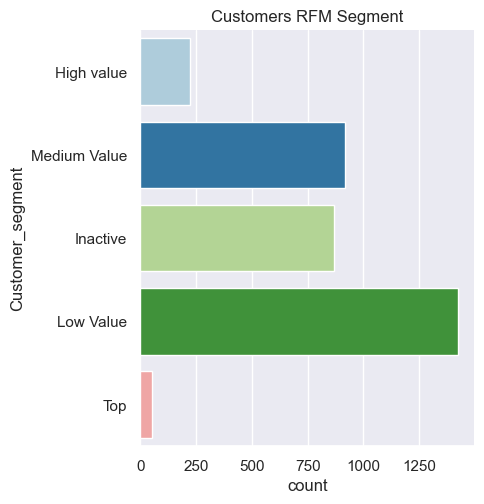

In [49]:
sns.catplot(data=customers_rfm, kind="count", y="Customer_segment",palette="Paired").set(title='Customers RFM Segment')

plt.show()

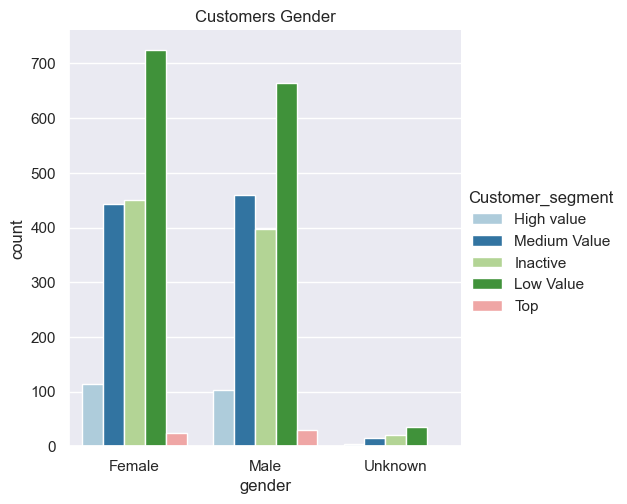

In [50]:
sns.catplot(data=customers_rfm, kind="count", x="gender", palette="Paired", hue="Customer_segment").set(title='Customers Gender')

plt.show()

In [51]:
customers_rfm.age_group.value_counts(normalize=True)

Gen X (40-54 years)           0.411697
Millennials (25-39 years)     0.274369
Baby Boomers (55-74 years)    0.254874
Gen Z (10-24 years)           0.035837
Interwar                      0.023222
Name: age_group, dtype: float64

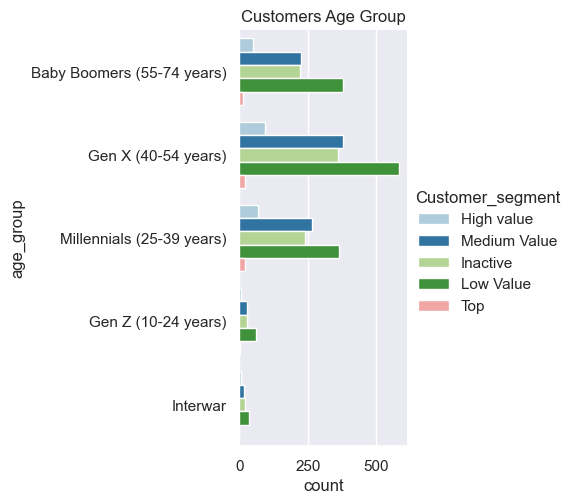

In [52]:
sns.catplot(data=customers_rfm, kind="count", y="age_group", palette="Paired", hue="Customer_segment").set(title='Customers Age Group')

plt.show()

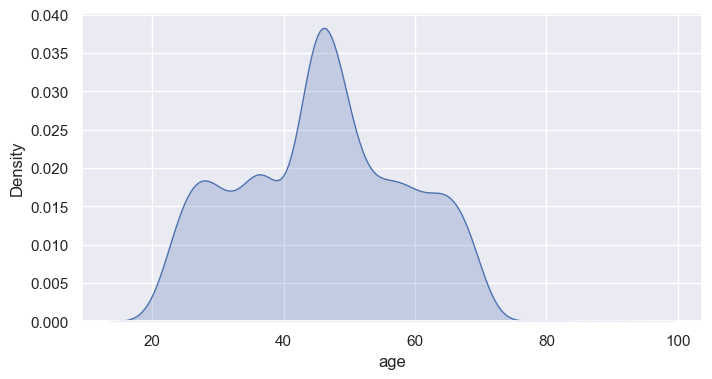

In [53]:
sns.kdeplot(customers_rfm, x="age", shade=True)
plt.show()

In [54]:
customers_rfm.job_industry_category.value_counts(normalize=True)

Manufacturing         0.201548
Financial Services    0.196674
Unknown               0.160550
Health                0.152523
Retail                0.087156
Property              0.065940
IT                    0.053612
Entertainment         0.035264
Argiculture           0.028670
Telecommunications    0.018062
Name: job_industry_category, dtype: float64

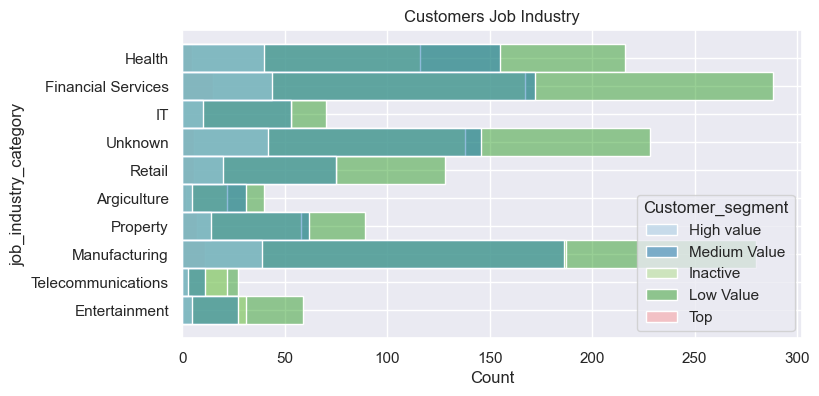

In [55]:
sns.histplot(data=customers_rfm, y="job_industry_category", palette="Paired", hue="Customer_segment").set(title='Customers Job Industry')
plt.show()

In [56]:
customers_rfm.wealth_segment.value_counts(normalize=True)

Mass Customer        0.500000
High Net Worth       0.256307
Affluent Customer    0.243693
Name: wealth_segment, dtype: float64

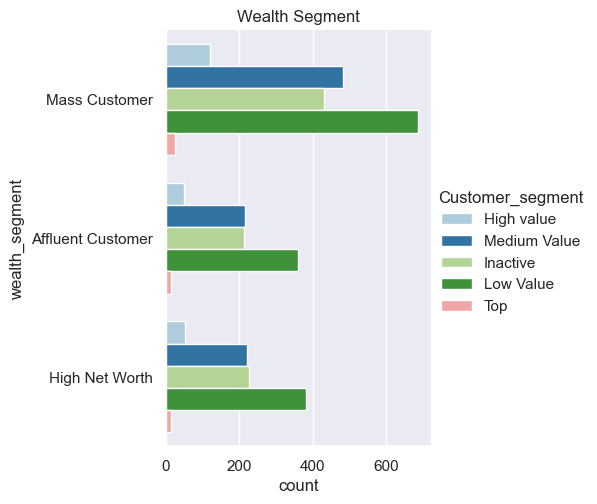

In [57]:
sns.catplot(data=customers_rfm, kind="count", y="wealth_segment", palette="Paired", hue="Customer_segment").set(title='Wealth Segment')

plt.show()

In [58]:
customers_rfm.owns_car.value_counts(normalize=True)

1    0.506594
0    0.493406
Name: owns_car, dtype: float64

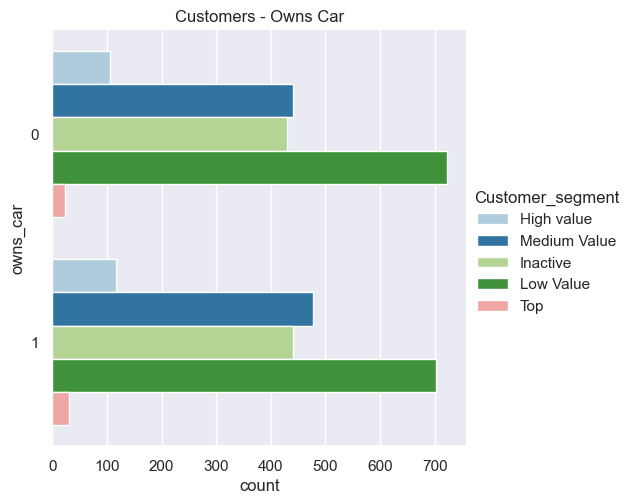

In [59]:
sns.catplot(data=customers_rfm, kind="count", y="owns_car", palette="Paired", hue="Customer_segment").set(title='Customers - Owns Car')

plt.show()

In [60]:
customers_rfm.state.value_counts(normalize=True)

NSW    0.534977
VIC    0.252294
QLD    0.212729
Name: state, dtype: float64

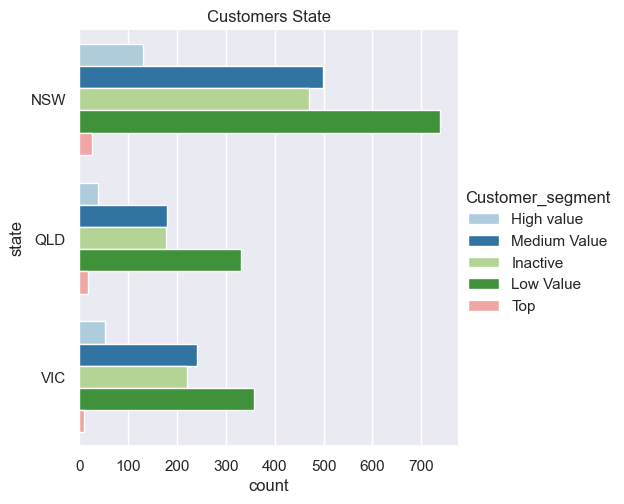

In [61]:
sns.catplot(data=customers_rfm, kind="count", y="state", palette="Paired", hue="Customer_segment").set(title='Customers State')

plt.show()

In [62]:
# Exporting df_customers and df_transactions to CSV for futher dashbooard building

customers_rfm.to_csv('customers.csv')
df_transactions_clean.to_csv('transactions.csv')

# Predicting Model

In [63]:
# Profiling customers_rfm
'''
profile_customers_rfm = ProfileReport(customers_rfm, title="Customers RFM Profiling Report")

profile_customers_rfm.to_file("customers_rfm_report.html")
'''

'\nprofile_customers_rfm = ProfileReport(customers_rfm, title="Customers RFM Profiling Report")\n\nprofile_customers_rfm.to_file("customers_rfm_report.html")\n'

In [64]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer


In [65]:
customers_rfm.columns

Index(['customer_id', 'gender', 'past_3_years_bike_related_purchases', 'DOB',
       'job_title', 'job_industry_category', 'wealth_segment',
       'deceased_indicator', 'owns_car', 'tenure', 'age', 'age_group',
       'address', 'postcode', 'state', 'country', 'property_valuation',
       'Frequency', 'profit', 'Recency', 'R_rank', 'F_rank', 'M_rank',
       'R_rank_norm', 'F_rank_norm', 'M_rank_norm', 'RFM_Score',
       'Customer_segment'],
      dtype='object')

In [66]:
customers_rfm.dtypes

customer_id                                     int64
gender                                       category
past_3_years_bike_related_purchases             int64
DOB                                    datetime64[ns]
job_title                                      object
job_industry_category                          object
wealth_segment                                 object
deceased_indicator                              int64
owns_car                                        int64
tenure                                        float64
age                                           float64
age_group                                      object
address                                        object
postcode                                        int64
state                                          object
country                                        object
property_valuation                              int64
Frequency                                       int64
profit                      

In [67]:
# Create an instance of the SimpleImputer class
imputer = SimpleImputer(strategy='most_frequent')

# Fit the imputer to the data and transform the data
customers_rfm_imputed = imputer.fit_transform(customers_rfm)

In [68]:
# Check the type of the customers_rfm_imputed data
print(type(customers_rfm_imputed))

# If the data is a NumPy array, convert it to a dataframe
if type(customers_rfm_imputed) == np.ndarray:
    customers_rfm_imputed = pd.DataFrame(customers_rfm_imputed, columns=customers_rfm.columns)


# Select the 'gender', 'job_industry_category', 'wealth_segment', 'age_group', and 'state' columns
X = customers_rfm_imputed[['gender', 'job_industry_category', 'wealth_segment', 'age_group', 'state']]

# Create an instance of the OneHotEncoder class
one_hot_encoder = OneHotEncoder(sparse=False)

# Encode the categorical columns
X_encoded = one_hot_encoder.fit_transform(X)

# Convert the encoded array to a dataframe
X_encoded_df = pd.DataFrame(X_encoded, columns=one_hot_encoder.get_feature_names())

# Merge the encoded dataframe back to the original dataframe
customers_rfm_encoded = customers_rfm_imputed.join(X_encoded_df)

# Display the resulting dataframe
customers_rfm_encoded.head()


<class 'numpy.ndarray'>


,customer_id,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,age,age_group,address,postcode,state,country,property_valuation,Frequency,profit,Recency,R_rank,F_rank,M_rank,R_rank_norm,F_rank_norm,M_rank_norm,RFM_Score,Customer_segment,x0_Female,x0_Male,x0_Unknown,x1_Argiculture,x1_Entertainment,x1_Financial Services,x1_Health,x1_IT,x1_Manufacturing,x1_Property,x1_Retail,x1_Telecommunications,x1_Unknown,x2_Affluent Customer,x2_High Net Worth,x2_Mass Customer,x3_Baby Boomers (55-74 years),x3_Gen X (40-54 years),x3_Gen Z (10-24 years),x3_Interwar,x3_Millennials (25-39 years),x4_NSW,x4_QLD,x4_VIC
0,1,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,0,1,11.0,70.0,Baby Boomers (55-74 years),060 Morning Avenue,2016,NSW,Australia,10,82,3018.1,7,3122.5,3097.5,1857.0,90.1,88.8,88.8,4.5,High value,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,0,1,16.0,43.0,Gen X (40-54 years),6 Meadow Vale Court,2153,NSW,Australia,10,78,2226.3,128,457.5,2973.0,1187.0,13.2,85.2,85.2,3.1,Medium Value,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,4,Male,33,1961-10-03,Unknown,IT,Mass Customer,0,0,7.0,62.0,Baby Boomers (55-74 years),0 Holy Cross Court,4211,QLD,Australia,9,31,220.6,195,137.5,1327.0,55.0,4.0,38.0,38.0,1.3,Inactive,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,5,Female,56,1977-05-13,Senior Editor,Unknown,Affluent Customer,0,1,8.0,46.0,Gen X (40-54 years),17979 Del Mar Point,2448,NSW,Australia,4,50,2394.9,16,2684.0,2013.0,1336.0,77.4,57.7,57.7,3.2,Medium Value,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,6,Male,35,1966-09-16,Unknown,Retail,High Net Worth,0,1,13.0,57.0,Baby Boomers (55-74 years),9 Oakridge Court,3216,VIC,Australia,9,30,3946.6,64,1263.5,1286.5,2491.0,36.5,36.9,36.9,1.8,Low Value,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [69]:
customers_rfm_encoded.columns

Index(['customer_id', 'gender', 'past_3_years_bike_related_purchases', 'DOB',
       'job_title', 'job_industry_category', 'wealth_segment',
       'deceased_indicator', 'owns_car', 'tenure', 'age', 'age_group',
       'address', 'postcode', 'state', 'country', 'property_valuation',
       'Frequency', 'profit', 'Recency', 'R_rank', 'F_rank', 'M_rank',
       'R_rank_norm', 'F_rank_norm', 'M_rank_norm', 'RFM_Score',
       'Customer_segment', 'x0_Female', 'x0_Male', 'x0_Unknown',
       'x1_Argiculture', 'x1_Entertainment', 'x1_Financial Services',
       'x1_Health', 'x1_IT', 'x1_Manufacturing', 'x1_Property', 'x1_Retail',
       'x1_Telecommunications', 'x1_Unknown', 'x2_Affluent Customer',
       'x2_High Net Worth', 'x2_Mass Customer',
       'x3_Baby Boomers (55-74 years)', 'x3_Gen X (40-54 years)',
       'x3_Gen Z (10-24 years)', 'x3_Interwar', 'x3_Millennials (25-39 years)',
       'x4_NSW', 'x4_QLD', 'x4_VIC'],
      dtype='object')

In [80]:
# Select the target column and the feature columns
y = customers_rfm_encoded['RFM_Score']



# Create X
features = ['deceased_indicator', 'owns_car', 'tenure', 'age', 'x0_Female', 'x0_Male', 'x0_Unknown',
       'x1_Argiculture', 'x1_Entertainment', 'x1_Financial Services',
       'x1_Health', 'x1_IT', 'x1_Manufacturing', 'x1_Property', 'x1_Retail',
       'x1_Telecommunications', 'x1_Unknown', 'x2_Affluent Customer',
       'x2_High Net Worth', 'x2_Mass Customer',
       'x3_Baby Boomers (55-74 years)', 'x3_Gen X (40-54 years)',
       'x3_Gen Z (10-24 years)', 'x3_Interwar', 'x3_Millennials (25-39 years)',
       'x4_NSW', 'x4_QLD', 'x4_VIC']
X = customers_rfm_encoded[features]
X = customers_rfm_encoded.drop('RFM_Score', axis=1)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Specify Model
model = DecisionTreeRegressor(random_state=1)
# Fit Model
model.fit(X_train, y_train)

# Make validation predictions and calculate mean absolute error
val_predictions = model.predict(val_X)
val_mae = mean_absolute_error(val_predictions, val_y)
print("Validation MAE when not specifying max_leaf_nodes: {:,.0f}".format(val_mae))

# Using best value for max_leaf_nodes
model = DecisionTreeRegressor(max_leaf_nodes=100, random_state=1)
model.fit(X_train, y_train)
val_predictions = rfm_model.predict(val_X)
val_mae = mean_absolute_error(val_predictions, val_y)
print("Validation MAE for best value of max_leaf_nodes: {:,.0f}".format(val_mae))

ValueError: could not convert string to float: 'Female'